# Heart disease prediction
## Sources
- https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
- https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning
- https://www.kaggle.com/roshansharma/heart-diseases-analysis
- https://www.kaggle.com/ahmadjaved097/classifying-heart-disease-patients
- https://www.kaggle.com/ronitf/heart-disease-uci/kernels
- https://colab.research.google.com/drive/13EThgYKSRwGBJJn_8iAvg-QWUWjCufB1#scrollTo=wd9UXbwBUxK-
- https://www.curiousily.com/posts/heart-disease-prediction-in-tensorflow-2/
- https://github.com/curiousily/Deep-Learning-For-Hackers/blob/master/2.heart_disease_prediction.ipynb
- https://www.kaggle.com/ronitf/heart-disease-uci
- https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
- https://github.com/ShubhankarRawat/Heart-Disease-Prediction/blob/master/heart_code.py

## Dataset columns
1. age in years
2. sex (1 = male; 0 = female)
3. chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. resting blood pressure (in mm Hg on admission to the hospital)
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target 	(0 = no heart disease; 1 = heart disease presence)


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [3]:
# load PIMA indians diabetes dataset
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#  age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal target
dataset.columns = [
    'age', 
    'sex', 
    'chest_pain_type', 
    'resting_blood_pressure', 
    'cholesterol', 
    'fasting_blood_sugar', 
    'rest_ecg', 
    'max_heart_rate_achieved',
    'exercise_induced_angina', 
    'st_depression', 
    'st_slope', 
    'num_major_vessels', 
    'thalassemia', 
    'target']

In [7]:
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataset.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C2F2174A8>,
      dtype=object)

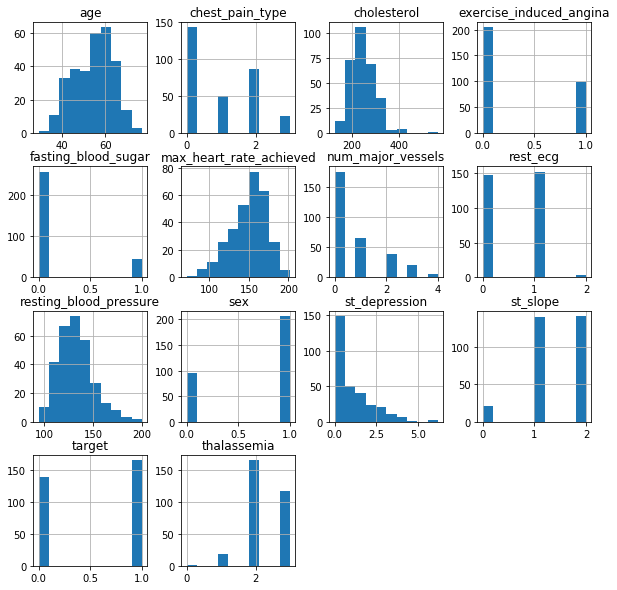

In [10]:
dataset.hist(bins = 10, figsize = (10,10))

In [11]:
# Show unique values for enums
category_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia', 'target']

for col in dataset.columns:
    if col in category_cols:
        print(col, ': ', dataset[col].unique())

sex :  [1 0]
chest_pain_type :  [3 2 1 0]
fasting_blood_sugar :  [1 0]
rest_ecg :  [0 1 2]
exercise_induced_angina :  [0 1]
st_slope :  [0 2 1]
thalassemia :  [1 2 3 0]
target :  [1 0]


In [12]:
# get number of values with 0 value
dataset.isin([0]).sum()

age                          0
sex                         96
chest_pain_type            143
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar        258
rest_ecg                   147
max_heart_rate_achieved      0
exercise_induced_angina    204
st_depression               99
st_slope                    21
num_major_vessels          175
thalassemia                  2
target                     138
dtype: int64

In [13]:
# get number of values with missing value
dataset.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [ ]:
# replace 0 values with mean of the whole column
#for col in ['resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved']:
#    mean_val = dataset[col].mean()
#    dataset[col] = dataset[col].replace(to_replace=0, value=mean_val)

In [14]:
dataset.isin([0]).sum()

age                          0
sex                         96
chest_pain_type            143
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar        258
rest_ecg                   147
max_heart_rate_achieved      0
exercise_induced_angina    204
st_depression               99
st_slope                    21
num_major_vessels          175
thalassemia                  2
target                     138
dtype: int64

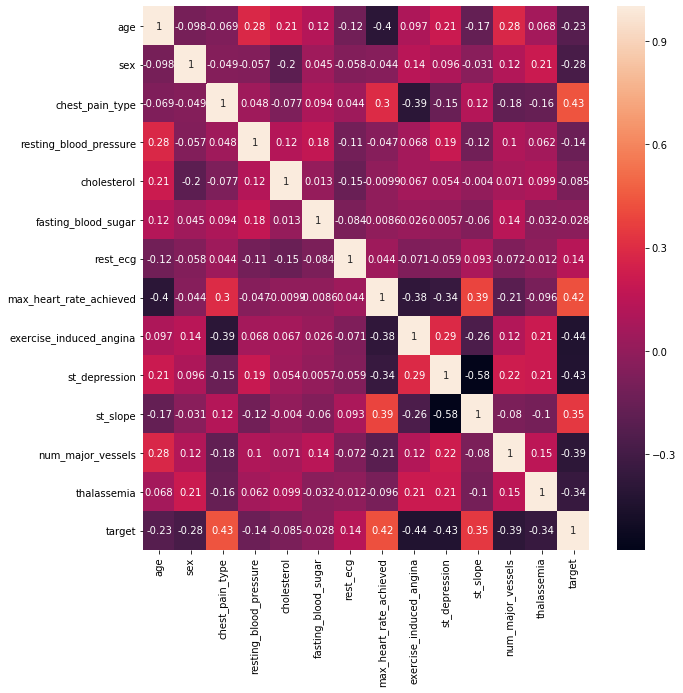

In [15]:
# show correlations
corr = dataset.corr(method='pearson')

import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True)

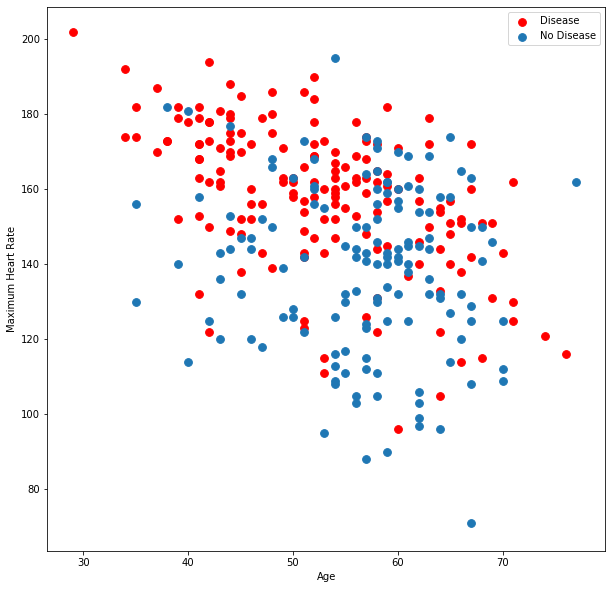

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.max_heart_rate_achieved[(dataset.target==1)], c="red", s=60)
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.max_heart_rate_achieved[(dataset.target==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

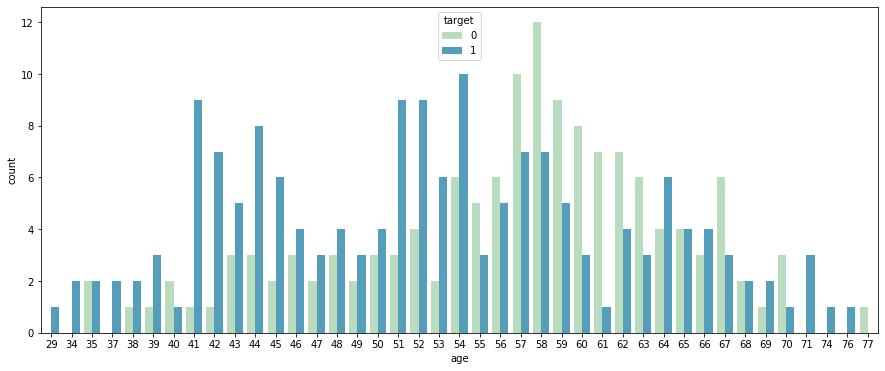

In [17]:
# Number of people who have heart disease according to age 
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = dataset, hue = 'target', palette='GnBu')
plt.show()

In [18]:
# sex :  [1 0]
# chest_pain_type :  [3 2 1 0]
# fasting_blood_sugar :  [1 0]
# rest_ecg :  [0 1 2]
# exercise_induced_angina :  [0 1]
# st_slope :  [0 2 1]
# thalassemia :  [1 2 3 0]
# target :  [1 0]

# 0..female, 1..male
dataset['sex_0'] = dataset.apply(lambda row: 0 if row.sex == 0 else 1, axis=1)

dataset['chest_pain_type_0'] = dataset.apply(lambda row: 1 if row.chest_pain_type == 0 else 0, axis=1)
dataset['chest_pain_type_1'] = dataset.apply(lambda row: 1 if row.chest_pain_type == 1 else 0, axis=1)
dataset['chest_pain_type_2'] = dataset.apply(lambda row: 1 if row.chest_pain_type == 2 else 0, axis=1)
dataset['chest_pain_type_3'] = dataset.apply(lambda row: 1 if row.chest_pain_type == 3 else 0, axis=1)

dataset['fasting_blood_sugar_0'] = dataset.apply(lambda row: 1 if row.fasting_blood_sugar == 0 else 0, axis=1)

dataset['rest_ecg_0'] = dataset.apply(lambda row: 1 if row.rest_ecg == 0 else 0, axis=1)
dataset['rest_ecg_1'] = dataset.apply(lambda row: 1 if row.rest_ecg == 1 else 0, axis=1)
dataset['rest_ecg_2'] = dataset.apply(lambda row: 1 if row.rest_ecg == 2 else 0, axis=1)

dataset['exercise_induced_angina_0'] = dataset.apply(lambda row: 1 if row.exercise_induced_angina == 0 else 0, axis=1)

dataset['st_slope_0'] = dataset.apply(lambda row: 1 if row.st_slope == 0 else 0, axis=1)
dataset['st_slope_1'] = dataset.apply(lambda row: 1 if row.st_slope == 1 else 0, axis=1)
dataset['st_slope_2'] = dataset.apply(lambda row: 1 if row.st_slope == 2 else 0, axis=1)

dataset['thalassemia_0'] = dataset.apply(lambda row: 1 if row.thalassemia == 0 else 0, axis=1)
dataset['thalassemia_1'] = dataset.apply(lambda row: 1 if row.thalassemia == 1 else 0, axis=1)
dataset['thalassemia_2'] = dataset.apply(lambda row: 1 if row.thalassemia == 2 else 0, axis=1)
dataset['thalassemia_3'] = dataset.apply(lambda row: 1 if row.thalassemia == 3 else 0, axis=1)

dataset.drop(columns=['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia'])


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_0,chest_pain_type_0,chest_pain_type_1,...,rest_ecg_1,rest_ecg_2,exercise_induced_angina_0,st_slope_0,st_slope_1,st_slope_2,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,0,...,1,0,1,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
300,68,144,193,141,3.4,2,0,1,1,0,...,1,0,1,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [19]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', 1), dataset['target'], test_size = .2, random_state=RANDOM_SEED)

In [20]:
X_train.shape

(242, 30)

In [21]:
# learn scaling from train dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
X_train = np.asarray(scaler.transform(X_train))
y_train = np.asarray(y_train)
X_test = np.asarray(scaler.transform(X_test))
y_test = np.asarray(y_test)

In [23]:
X_train

array([[0.27083333, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.60416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35416667, 1.        , 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.83333333, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.35416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.70833333, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [48]:
# Create NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# define a sequential model
model = Sequential()

# add hidden - fully connected layer
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

# add outputlayer
model.add(Dense(1))
model.add(Activation('sigmoid'))

# build model
model.compile(optimizer="adam",
             loss='binary_crossentropy',
             metrics=['binary_accuracy'])

In [49]:
epochs = 500

hist = model.fit(
          X_train,
          y_train,
          epochs=epochs,
          verbose=1,
          batch_size=16,
          shuffle=True,
          validation_data=(X_test,y_test)
)

Train on 242 samples, validate on 61 samples
Epoch 1/500
242/242 [==============================] - 1s 3ms/sample - loss: 0.7533 - binary_accuracy: 0.4669 - val_loss: 0.6648 - val_binary_accuracy: 0.4754
Epoch 2/500
242/242 [==============================] - 0s 221us/sample - loss: 0.6536 - binary_accuracy: 0.6033 - val_loss: 0.6225 - val_binary_accuracy: 0.8361
Epoch 3/500
242/242 [==============================] - 0s 258us/sample - loss: 0.6261 - binary_accuracy: 0.7107 - val_loss: 0.5942 - val_binary_accuracy: 0.8689
Epoch 4/500
242/242 [==============================] - 0s 221us/sample - loss: 0.6102 - binary_accuracy: 0.6942 - val_loss: 0.5684 - val_binary_accuracy: 0.8361
Epoch 5/500
242/242 [==============================] - 0s 194us/sample - loss: 0.5938 - binary_accuracy: 0.7190 - val_loss: 0.5445 - val_binary_accuracy: 0.8361
Epoch 6/500
242/242 [==============================] - 0s 350us/sample - loss: 0.5682 - binary_accuracy: 0.7686 - val_loss: 0.5251 - val_binary_accuracy

242/242 [==============================] - 0s 221us/sample - loss: 0.3748 - binary_accuracy: 0.8347 - val_loss: 0.3360 - val_binary_accuracy: 0.8689
Epoch 52/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3867 - binary_accuracy: 0.8306 - val_loss: 0.3328 - val_binary_accuracy: 0.8525
Epoch 53/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3985 - binary_accuracy: 0.8306 - val_loss: 0.3315 - val_binary_accuracy: 0.8525
Epoch 54/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3974 - binary_accuracy: 0.8306 - val_loss: 0.3364 - val_binary_accuracy: 0.8689
Epoch 55/500
242/242 [==============================] - 0s 221us/sample - loss: 0.3893 - binary_accuracy: 0.8223 - val_loss: 0.3394 - val_binary_accuracy: 0.8689
Epoch 56/500
242/242 [==============================] - 0s 129us/sample - loss: 0.4055 - binary_accuracy: 0.8306 - val_loss: 0.3177 - val_binary_accuracy: 0.8689
Epoch 57/500
242/242 [===================

Epoch 102/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3551 - binary_accuracy: 0.8388 - val_loss: 0.3334 - val_binary_accuracy: 0.8525
Epoch 103/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3566 - binary_accuracy: 0.8554 - val_loss: 0.3410 - val_binary_accuracy: 0.8689
Epoch 104/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3587 - binary_accuracy: 0.8471 - val_loss: 0.3440 - val_binary_accuracy: 0.8689
Epoch 105/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3627 - binary_accuracy: 0.8388 - val_loss: 0.3311 - val_binary_accuracy: 0.8525
Epoch 106/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3643 - binary_accuracy: 0.8388 - val_loss: 0.3171 - val_binary_accuracy: 0.8689
Epoch 107/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3622 - binary_accuracy: 0.8471 - val_loss: 0.3201 - val_binary_accuracy: 0.8689
Epoch 108/500
242/242 

242/242 [==============================] - 0s 129us/sample - loss: 0.3478 - binary_accuracy: 0.8471 - val_loss: 0.3320 - val_binary_accuracy: 0.8525
Epoch 153/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3624 - binary_accuracy: 0.8306 - val_loss: 0.3326 - val_binary_accuracy: 0.8525
Epoch 154/500
242/242 [==============================] - 0s 187us/sample - loss: 0.3560 - binary_accuracy: 0.8512 - val_loss: 0.3209 - val_binary_accuracy: 0.8525
Epoch 155/500
242/242 [==============================] - 0s 228us/sample - loss: 0.3562 - binary_accuracy: 0.8430 - val_loss: 0.3282 - val_binary_accuracy: 0.8525
Epoch 156/500
242/242 [==============================] - 0s 329us/sample - loss: 0.3550 - binary_accuracy: 0.8636 - val_loss: 0.3329 - val_binary_accuracy: 0.8525
Epoch 157/500
242/242 [==============================] - 0s 332us/sample - loss: 0.3491 - binary_accuracy: 0.8388 - val_loss: 0.3400 - val_binary_accuracy: 0.8525
Epoch 158/500
242/242 [=============

242/242 [==============================] - 0s 194us/sample - loss: 0.3458 - binary_accuracy: 0.8388 - val_loss: 0.3365 - val_binary_accuracy: 0.8689
Epoch 203/500
242/242 [==============================] - 0s 221us/sample - loss: 0.3388 - binary_accuracy: 0.8512 - val_loss: 0.3300 - val_binary_accuracy: 0.8689
Epoch 204/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3396 - binary_accuracy: 0.8554 - val_loss: 0.3337 - val_binary_accuracy: 0.8689
Epoch 205/500
242/242 [==============================] - 0s 146us/sample - loss: 0.3586 - binary_accuracy: 0.8347 - val_loss: 0.3379 - val_binary_accuracy: 0.8689
Epoch 206/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3484 - binary_accuracy: 0.8471 - val_loss: 0.3265 - val_binary_accuracy: 0.8852
Epoch 207/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3498 - binary_accuracy: 0.8347 - val_loss: 0.3233 - val_binary_accuracy: 0.8689
Epoch 208/500
242/242 [=============

242/242 [==============================] - 0s 129us/sample - loss: 0.3556 - binary_accuracy: 0.8471 - val_loss: 0.3298 - val_binary_accuracy: 0.8852
Epoch 253/500
242/242 [==============================] - 0s 135us/sample - loss: 0.3476 - binary_accuracy: 0.8678 - val_loss: 0.3239 - val_binary_accuracy: 0.8852
Epoch 254/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3415 - binary_accuracy: 0.8554 - val_loss: 0.3241 - val_binary_accuracy: 0.8852
Epoch 255/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3377 - binary_accuracy: 0.8554 - val_loss: 0.3277 - val_binary_accuracy: 0.8852
Epoch 256/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3513 - binary_accuracy: 0.8471 - val_loss: 0.3240 - val_binary_accuracy: 0.8852
Epoch 257/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3398 - binary_accuracy: 0.8347 - val_loss: 0.3249 - val_binary_accuracy: 0.8852
Epoch 258/500
242/242 [=============

242/242 [==============================] - 0s 194us/sample - loss: 0.3261 - binary_accuracy: 0.8678 - val_loss: 0.3317 - val_binary_accuracy: 0.8689
Epoch 303/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3339 - binary_accuracy: 0.8595 - val_loss: 0.3362 - val_binary_accuracy: 0.9016
Epoch 304/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3377 - binary_accuracy: 0.8471 - val_loss: 0.3285 - val_binary_accuracy: 0.8689
Epoch 305/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3249 - binary_accuracy: 0.8554 - val_loss: 0.3259 - val_binary_accuracy: 0.8689
Epoch 306/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3363 - binary_accuracy: 0.8595 - val_loss: 0.3263 - val_binary_accuracy: 0.8689
Epoch 307/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3434 - binary_accuracy: 0.8512 - val_loss: 0.3336 - val_binary_accuracy: 0.8852
Epoch 308/500
242/242 [=============

242/242 [==============================] - 0s 156us/sample - loss: 0.3227 - binary_accuracy: 0.8595 - val_loss: 0.3312 - val_binary_accuracy: 0.8852
Epoch 353/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3290 - binary_accuracy: 0.8636 - val_loss: 0.3323 - val_binary_accuracy: 0.8852
Epoch 354/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3290 - binary_accuracy: 0.8554 - val_loss: 0.3372 - val_binary_accuracy: 0.8689
Epoch 355/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3294 - binary_accuracy: 0.8512 - val_loss: 0.3326 - val_binary_accuracy: 0.8852
Epoch 356/500
242/242 [==============================] - 0s 197us/sample - loss: 0.3359 - binary_accuracy: 0.8554 - val_loss: 0.3292 - val_binary_accuracy: 0.8852
Epoch 357/500
242/242 [==============================] - 0s 152us/sample - loss: 0.3354 - binary_accuracy: 0.8595 - val_loss: 0.3336 - val_binary_accuracy: 0.8852
Epoch 358/500
242/242 [=============

242/242 [==============================] - 0s 194us/sample - loss: 0.3275 - binary_accuracy: 0.8554 - val_loss: 0.3369 - val_binary_accuracy: 0.8689
Epoch 403/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3204 - binary_accuracy: 0.8595 - val_loss: 0.3354 - val_binary_accuracy: 0.8689
Epoch 404/500
242/242 [==============================] - 0s 204us/sample - loss: 0.3203 - binary_accuracy: 0.8636 - val_loss: 0.3355 - val_binary_accuracy: 0.8689
Epoch 405/500
242/242 [==============================] - 0s 146us/sample - loss: 0.3114 - binary_accuracy: 0.8554 - val_loss: 0.3326 - val_binary_accuracy: 0.8852
Epoch 406/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3093 - binary_accuracy: 0.8554 - val_loss: 0.3315 - val_binary_accuracy: 0.8852
Epoch 407/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3113 - binary_accuracy: 0.8760 - val_loss: 0.3324 - val_binary_accuracy: 0.8852
Epoch 408/500
242/242 [=============

242/242 [==============================] - 0s 129us/sample - loss: 0.3331 - binary_accuracy: 0.8512 - val_loss: 0.3452 - val_binary_accuracy: 0.8852
Epoch 453/500
242/242 [==============================] - 0s 202us/sample - loss: 0.3062 - binary_accuracy: 0.8595 - val_loss: 0.3416 - val_binary_accuracy: 0.8852
Epoch 454/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3220 - binary_accuracy: 0.8678 - val_loss: 0.3405 - val_binary_accuracy: 0.8852
Epoch 455/500
242/242 [==============================] - 0s 156us/sample - loss: 0.3251 - binary_accuracy: 0.8636 - val_loss: 0.3430 - val_binary_accuracy: 0.8852
Epoch 456/500
242/242 [==============================] - 0s 129us/sample - loss: 0.3242 - binary_accuracy: 0.8595 - val_loss: 0.3406 - val_binary_accuracy: 0.8852
Epoch 457/500
242/242 [==============================] - 0s 194us/sample - loss: 0.3142 - binary_accuracy: 0.8595 - val_loss: 0.3469 - val_binary_accuracy: 0.8852
Epoch 458/500
242/242 [=============

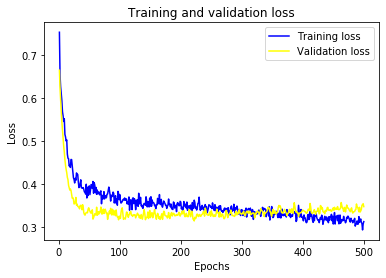

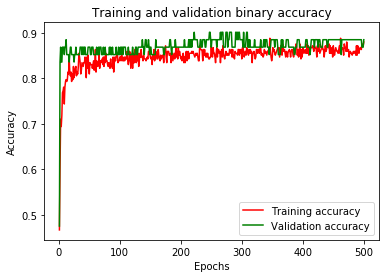

In [50]:
history_dict = hist.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss', color='blue')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='yellow')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

plt.plot(epochs, accuracy, 'b', label='Training accuracy', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy', color='green')
plt.title('Training and validation binary accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

54  classified correctly
7  classified incorrectly


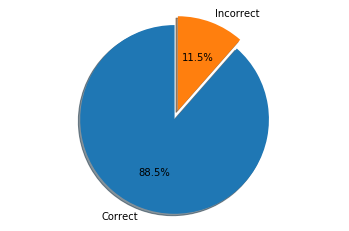

In [51]:
# predictions
predictions = model.predict(X_test)

# see which we predicted correctly and which not
predicted_classes = model.predict_classes(X_test)

n_correct = 0
n_incorrect = 0

for i, predicted_class in enumerate(predicted_classes):
    if predicted_class == y_test[i]:
        n_correct += 1
    else:
        n_incorrect += 1

print(n_correct," classified correctly")
print(n_incorrect," classified incorrectly")

labels = ['Correct', 'Incorrect']
sizes = [n_correct, n_incorrect]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()